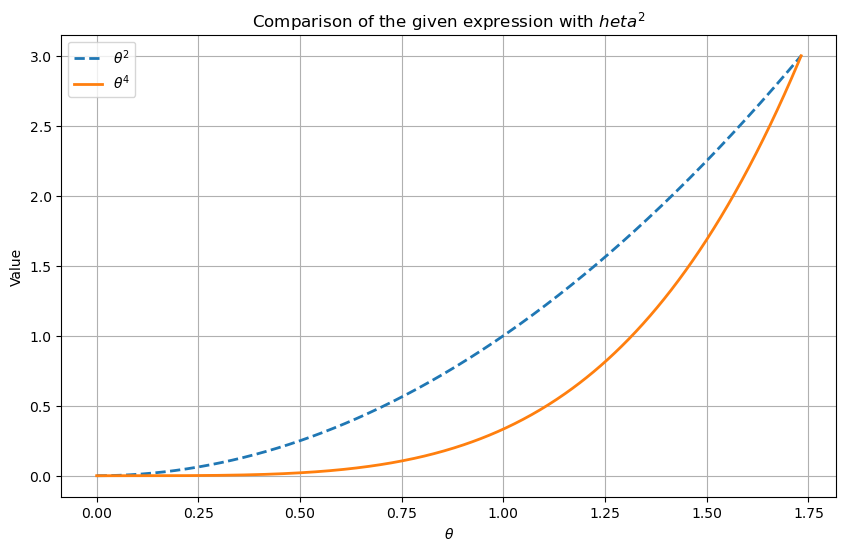

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigma and theta range
sigma = 1
theta = np.linspace(0, 1.732, 500)  # Adjust range as needed

# Compute the expression:
# ( (3√3 * θ² - θ³) / (9*sigma²) )² with sigma=1 becomes ( (3√3 * θ² - θ³) / 9 )².
expr = ((3*np.sqrt(3)*theta**2 - theta**3) / 9)**2

# Compare with θ²
theta_squared = theta**2
theta_squared2 = theta**4/3

# Plot
plt.figure(figsize=(10,6))
#plt.plot(theta, expr, label=r'$((3\sqrt{3}\,\theta^{2} - \theta^{3})/9)^{2}$', linewidth=2)
plt.plot(theta, theta_squared , label=r'$\theta^{2}$', linestyle='--', linewidth=2)
plt.plot(theta, theta_squared2 , label=r'$\theta^{4}$', linewidth=2)

plt.title("Comparison of the given expression with $\theta^{2}$")
plt.xlabel("$\\theta$")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()


## Consider guassian mixture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n = 200
# Define the compute_expectation function
def compute_expectation(theta, sigma, num_samples=100000):
    """
    Compute the expectation of 1{X1^2 < X2^2}X1 where X1, X2 ~ N(theta, sigma^2)
    using Monte Carlo simulation.
    
    Parameters:
        theta (float): Mean of the normal distributions.
        sigma (float): Standard deviation of the normal distributions.
        num_samples (int): Number of Monte Carlo samples to generate.
    
    Returns:
        float: Estimated expectation value.
    """
    # Generate random samples for X1 and X2
    X1 = np.random.normal(theta, sigma, num_samples)
    X2 = np.random.normal(theta, sigma, num_samples)

    
    # Compute the indicator 1{X1^2 < X2^2}
    indicator = (X1**2 < X2**2).astype(float)
    
    # Compute the expectation
    expectation1 = 4 * np.mean(indicator * X1)**2 * (n/2 -1) *n/2
    # expectation = 2 * np.mean(indicator * X1**2) * n/2 + expectation1
    return expectation1*4/n**2

# Function to compute estimated and baseline expectations for a range of theta values
def compute_expectations_over_theta(sigma, theta_range, num_samples=10000000):
    estimated_expectations = []
    baseline_expectations = []
    
    for theta in theta_range:
        # Compute estimated expectation
        estimated = compute_expectation(theta, sigma, num_samples)
        estimated_expectations.append(estimated)
        
        # Compute baseline expectation
        baseline1 = theta**2 * (n/2 -1) *n/2*4/n**2
        baseline = (0.5 * (theta**2 + sigma**2) + 0.5 * theta**2 * n/2 + baseline1)*4/n**2
        baseline_expectations.append(baseline1)
    
    return estimated_expectations, baseline_expectations

# Define the range for theta
theta_range = np.linspace(0, 50, num=100)  # Reduced number for practical plotting
sigma = 1

# Compute expectations
estimated_expectations, baseline_expectations = compute_expectations_over_theta(sigma, theta_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(theta_range, estimated_expectations, label="Estimated Expectation", linestyle="--",color="blue")
plt.plot(theta_range, baseline_expectations, label="Baseline Expectation", linestyle="-")
plt.xlabel("Theta")
plt.ylabel("Expectation")
plt.title("Comparison of Estimated and Baseline Expectations")
plt.legend()
plt.grid(True)
plt.show()

# Compute the ratio of estimated to baseline expectations
ratios = np.array(estimated_expectations) / np.array(baseline_expectations)

# Plot the ratio
plt.figure(figsize=(10, 6))
plt.plot(theta_range, ratios, label="Ratio (Estimated / Baseline)", color="red")
plt.xlabel("Theta")
plt.ylabel("Ratio")
plt.title("Change in Ratio of Estimated to Baseline Expectations")
plt.legend()
plt.grid(True)
plt.show()

min_ratio = np.min(ratios)
min_theta = theta_range[np.argmin(ratios)]

min_ratio, min_theta

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed and initialize variables
np.random.seed(42)
n = 1000
p = 200
mu = np.random.rand(p)  # Random mean vector of dimension p
sigma = 1
eps = 0
c = 4

In [8]:
# Generate noise variable Z using the mixture distribution
u = np.random.rand(n)
Z = np.zeros((n, p))  # Z is a matrix of shape (n, p)

# For each sample, decide from which distribution to draw
for i in range(n):
    if u[i] < eps:
        Z[i, :] = np.random.normal(mu, c * sigma, p)
    else:
        Z[i, :] = np.random.normal(mu, sigma, p)


In [9]:
# Initialize with a small set of data
init_samples = 100
cur_Z = Z[:init_samples]
mu_inc = [np.mean(cur_Z, axis=0)]  # Store incremental estimates
mu_all = [np.mean(cur_Z, axis=0)]  # Store all data estimates

# Store initial error for both methods
err_inc = [np.mean((mu_inc[0] - mu) ** 2)]
err_all = [np.mean((mu_all[0] - mu) ** 2)]

# Incremental Weighted Mean Estimation
n_iter = 15  # Set number of iterations
batch = 50  # Number of new samples to add in each iteration

In [10]:
for it in range(1, n_iter):
    # Add a small batch of new data
    if (init_samples + batch * it) < n:
        new_data = Z[init_samples + batch * it : init_samples + batch * (it + 1)]
        cur_Z = np.vstack((cur_Z, new_data))
    
    # Compute residuals and update mean estimate
    res = cur_Z - mu_inc[-1]
    w = 1.0 / (np.linalg.norm(res, axis=1) ** 2 + 1e-8)  # Add a small constant to avoid division by zero
    w /= np.sum(w)
    mu_est = np.dot(w, cur_Z)
    mu_inc.append(mu_est)
    mse_inc = np.mean((mu_est - mu) ** 2)
    err_inc.append(mse_inc)
    
    # Print incremental mean estimate norm
    print(f"Iteration {it}, Incremental Weighted Mean Estimate Norm: {np.linalg.norm(mu_est)}")

# Mean Estimation Using All Data
cur_Z = Z[:init_samples]
mu_all = [np.mean(cur_Z, axis=0)]  # Re-initialize using initial data

Iteration 1, Incremental Weighted Mean Estimate Norm: 8.053961945594258
Iteration 2, Incremental Weighted Mean Estimate Norm: 8.050982069510676
Iteration 3, Incremental Weighted Mean Estimate Norm: 8.063378837227994
Iteration 4, Incremental Weighted Mean Estimate Norm: 8.053620375437859
Iteration 5, Incremental Weighted Mean Estimate Norm: 8.038692483372653
Iteration 6, Incremental Weighted Mean Estimate Norm: 8.051840811380984
Iteration 7, Incremental Weighted Mean Estimate Norm: 8.028065080633286
Iteration 8, Incremental Weighted Mean Estimate Norm: 8.047215370203741
Iteration 9, Incremental Weighted Mean Estimate Norm: 8.053093949553276
Iteration 10, Incremental Weighted Mean Estimate Norm: 8.056486175584347
Iteration 11, Incremental Weighted Mean Estimate Norm: 8.06765283778962
Iteration 12, Incremental Weighted Mean Estimate Norm: 8.064821403737541
Iteration 13, Incremental Weighted Mean Estimate Norm: 8.056065619791289
Iteration 14, Incremental Weighted Mean Estimate Norm: 8.0522

In [11]:
for it in range(1, n_iter):
    # Add a small batch of new data
    if (init_samples + batch * it) < n:
        new_data = Z[init_samples + batch * it : init_samples + batch * (it + 1)]
        cur_Z = np.vstack((cur_Z, new_data))
    
    # Update mean estimate using all data
    mu_est_all = np.mean(cur_Z, axis=0)
    mu_all.append(mu_est_all)
    mse_all = np.mean((mu_est_all - mu) ** 2)
    err_all.append(mse_all)
    
    # Print all data mean estimate norm
    print(f"Iteration {it}, Mean Using All Data Estimate Norm: {np.linalg.norm(mu_est_all)}")

Iteration 1, Mean Using All Data Estimate Norm: 8.058354817512345
Iteration 2, Mean Using All Data Estimate Norm: 8.056417075473016
Iteration 3, Mean Using All Data Estimate Norm: 8.070595394833008
Iteration 4, Mean Using All Data Estimate Norm: 8.063741131095302
Iteration 5, Mean Using All Data Estimate Norm: 8.048268966030008
Iteration 6, Mean Using All Data Estimate Norm: 8.061934049787874
Iteration 7, Mean Using All Data Estimate Norm: 8.037594834827862
Iteration 8, Mean Using All Data Estimate Norm: 8.05476503517347
Iteration 9, Mean Using All Data Estimate Norm: 8.059792198417462
Iteration 10, Mean Using All Data Estimate Norm: 8.060340635443179
Iteration 11, Mean Using All Data Estimate Norm: 8.07045439627046
Iteration 12, Mean Using All Data Estimate Norm: 8.067622503409861
Iteration 13, Mean Using All Data Estimate Norm: 8.06043259944956
Iteration 14, Mean Using All Data Estimate Norm: 8.05696903287643


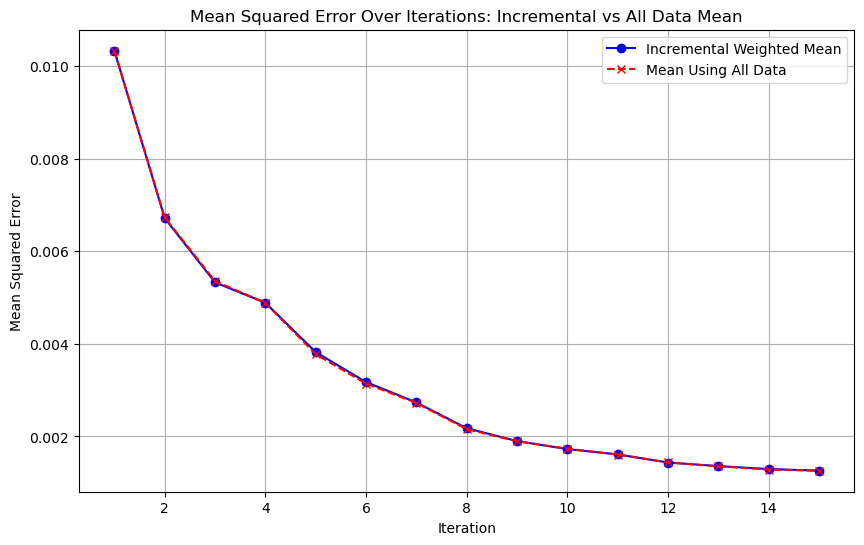

In [12]:
# Plot the error over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iter + 1), err_inc, marker='o', linestyle='-', color='b', label='Incremental Weighted Mean')
plt.plot(range(1, n_iter + 1), err_all, marker='x', linestyle='--', color='r', label='Mean Using All Data')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Over Iterations: Incremental vs All Data Mean')
plt.legend()
plt.grid(True)
plt.show()